In [1]:
#####################
# Library Loading
#####################
library(tidyverse)
library(cowplot)
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  3.0.1     ✔ dplyr   0.8.4
✔ tidyr   0.8.1     ✔ stringr 1.4.0
✔ readr   1.1.1     ✔ forcats 0.3.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************




In [2]:
#####################
# Config Theme
#####################
theme_set(theme_minimal())
options(repr.plot.width=10, repr.plot.height=5)

In [3]:
#####################
# Color Pallett
#####################
GroupID_Color_List = c("Naive"="#88008A", "CCR6neg"="#FFA500", "CCR6low"="#0456f8", "CCR6int"="#1D8F06", "CCR6high"="#e51134")
GroupID_Order_List = c("Naive", "CCR6neg", "CCR6low", "CCR6int", "CCR6high")
GroupID_Label_List = c("Naive"="Naive", "CCR6neg"=expression(paste("CCR6"^neg)), "CCR6low"=expression(paste("CCR6"^low)), "CCR6int"=expression(paste("CCR6"^int)), "CCR6high"=expression(paste("CCR6"^high)))

In [5]:
#####################
# Input/Output
#####################
methylation_file_Path = "../Data/plotdata_donorstats1_topsite-slim-upreg.xlsx"
gene_list_file_Path = "../Data/Methylation_upreg_gene_list_Oct_31.txt"

In [6]:
#####################
# Read I/O
#####################
methylation_DF = read_excel(methylation_file_Path, col_names = TRUE)
head(methylation_DF, n=5L)
dim(methylation_DF)
gene_list_DF = read_tsv(gene_list_file_Path)
#head(gene_list_DF, n=5L)
#dim(gene_list_DF)

TargetID,ILMNID,gene_first_listed,gene_targetID,reg,reg2,NAME OF FORMER VARIABLE,beta,Sample Name,Array ID,Sample ID Cy3,cell3,Donor,growth,sample,condition,array,beta_stats_donor_range
cg04269510,cg04269510,CCR6,CCR6 cg04269510,upreg,upreg,_959740144_R01C01_AVG_Beta,0.730,CCR6neg_D2_d0,Hsmb-201959740144-R01C01,AB3061,CCR6neg,D2,d0,CCR6neg_d0_D2_AB3061,CCR6neg_d0,39,0.7284
cg04269510,cg04269510,CCR6,CCR6 cg04269510,upreg,upreg,_959740144_R02C01_AVG_Beta,0.485,CCR6one_D2_d0,Hsmb-201959740144-R02C01,AB3062,CCR6low,D2,d0,CCR6low_d0_D2_AB3062,CCR6low_d0,40,0.7284
cg04269510,cg04269510,CCR6,CCR6 cg04269510,upreg,upreg,_959740144_R03C01_AVG_Beta,0.225,CCR6two_D2_d0,Hsmb-201959740144-R03C01,AB3063,CCR6int,D2,d0,CCR6int_d0_D2_AB3063,CCR6int_d0,41,0.7284
cg04269510,cg04269510,CCR6,CCR6 cg04269510,upreg,upreg,_959740144_R04C01_AVG_Beta,0.081,CCR6three_D2_d0,Hsmb-201959740144-R04C01,AB3064,CCR6high,D2,d0,CCR6high_d0_D2_AB3064,CCR6high_d0,42,0.7284
cg04269510,cg04269510,CCR6,CCR6 cg04269510,upreg,upreg,_959740144_R05C01_AVG_Beta,0.820,Naive_D2_d7NP,Hsmb-201959740144-R05C01,AB3065,Naive,D2,d7NP,Naive_d7NP_D2_AB3065,Naive_d7NP,43,0.7284


[1] 392  18

Parsed with column specification:
cols(
  GeneID = col_character()
)



In [7]:
####################
#Data Wrangling
####################

#1- filter genes
filter_methylation_DF = methylation_DF %>% filter(gene_first_listed %in% gene_list_DF$GeneID)
#head(filter_methylation_DF)
#dim(filter_methylation_DF)

#2- add new column based on intersection
cell_type_List = sort(unique(filter_methylation_DF$cell3), decreasing=TRUE)
#
growth_List = sort(unique(filter_methylation_DF$growth), decreasing=FALSE)
#
filter_methylation_DF$cell_type = factor(filter_methylation_DF$cell3, levels=cell_type_List, ordered = TRUE)
filter_methylation_DF$growth = factor(filter_methylation_DF$growth, levels=growth_List, ordered = TRUE)
filter_methylation_DF$target_column <- interaction(filter_methylation_DF$cell_type, filter_methylation_DF$growth, sep="_", lex.order = TRUE)
head(filter_methylation_DF)
dim(filter_methylation_DF)

TargetID,ILMNID,gene_first_listed,gene_targetID,reg,reg2,NAME OF FORMER VARIABLE,beta,Sample Name,Array ID,Sample ID Cy3,cell3,Donor,growth,sample,condition,array,beta_stats_donor_range,cell_type,target_column
cg04269510,cg04269510,CCR6,CCR6 cg04269510,upreg,upreg,_959740144_R01C01_AVG_Beta,0.730,CCR6neg_D2_d0,Hsmb-201959740144-R01C01,AB3061,CCR6neg,D2,d0,CCR6neg_d0_D2_AB3061,CCR6neg_d0,39,0.7284,CCR6neg,CCR6neg_d0
cg04269510,cg04269510,CCR6,CCR6 cg04269510,upreg,upreg,_959740144_R02C01_AVG_Beta,0.485,CCR6one_D2_d0,Hsmb-201959740144-R02C01,AB3062,CCR6low,D2,d0,CCR6low_d0_D2_AB3062,CCR6low_d0,40,0.7284,CCR6low,CCR6low_d0
cg04269510,cg04269510,CCR6,CCR6 cg04269510,upreg,upreg,_959740144_R03C01_AVG_Beta,0.225,CCR6two_D2_d0,Hsmb-201959740144-R03C01,AB3063,CCR6int,D2,d0,CCR6int_d0_D2_AB3063,CCR6int_d0,41,0.7284,CCR6int,CCR6int_d0
cg04269510,cg04269510,CCR6,CCR6 cg04269510,upreg,upreg,_959740144_R04C01_AVG_Beta,0.081,CCR6three_D2_d0,Hsmb-201959740144-R04C01,AB3064,CCR6high,D2,d0,CCR6high_d0_D2_AB3064,CCR6high_d0,42,0.7284,CCR6high,CCR6high_d0
cg04269510,cg04269510,CCR6,CCR6 cg04269510,upreg,upreg,_959740144_R05C01_AVG_Beta,0.820,Naive_D2_d7NP,Hsmb-201959740144-R05C01,AB3065,Naive,D2,d7NP,Naive_d7NP_D2_AB3065,Naive_d7NP,43,0.7284,Naive,Naive_d7NP
cg04269510,cg04269510,CCR6,CCR6 cg04269510,upreg,upreg,_959740144_R06C01_AVG_Beta,0.735,CCR6neg_D2_d7NP,Hsmb-201959740144-R06C01,AB3066,CCR6neg,D2,d7NP,CCR6neg_d7NP_D2_AB3066,CCR6neg_d7NP,44,0.7284,CCR6neg,CCR6neg_d7NP


[1] 336  20

In [4]:
Customized_Color_Label_List = c(
    "Naive_d0"="#88008A",
    "Naive_d7NP"="#88008A",
    "Naive_d7P"="#88008A",
    "CCR6neg_d0"="#FFA500",
    "CCR6neg_d7NP"="#FFA500",
    "CCR6neg_d7P"="#FFA500",
    "CCR6low_d0"="#0456f8",
    "CCR6low_d7NP"="#0456f8",
    "CCR6low_d7P"="#0456f8",
    "CCR6int_d0"="#1D8F06",
    "CCR6int_d7NP"="#1D8F06",
    "CCR6int_d7P"="#1D8F06",
    "CCR6high_d0"="#e51134",
    "CCR6high_d7NP"="#e51134",
    "CCR6high_d7P"="#e51134")

Customized_GroupID_Label_List = c(
    "Naive_d0"=expression(scriptscriptstyle("d0")),
    "Naive_d7NP"=expression(paste(scriptstyle("Naive"), scriptscriptstyle("  "), scriptscriptstyle("d7NP"))),
    "Naive_d7P"=expression(scriptscriptstyle("d7P")),
    
    "CCR6neg_d0"=expression(scriptscriptstyle("d0")),
    "CCR6neg_d7NP"=expression(paste(scriptstyle("CCR6"^neg),scriptscriptstyle("  "), scriptscriptstyle("d7NP"))),
    "CCR6neg_d7P"=expression(scriptscriptstyle("d7P")),
    
    "CCR6low_d0"=expression(scriptscriptstyle("d0")),
    "CCR6low_d7NP"=expression(paste(scriptstyle("CCR6"^low),scriptscriptstyle("  "), scriptscriptstyle("d7NP"))),
    "CCR6low_d7P"=expression(scriptscriptstyle("d7P")),
    
    "CCR6int_d0"=expression(scriptscriptstyle("d0")),
    "CCR6int_d7NP"=expression(paste(scriptstyle("CCR6"^int),scriptscriptstyle("  "), scriptscriptstyle("d7NP"))),
    "CCR6int_d7P"=expression(scriptscriptstyle("d7P")),
    
    "CCR6high_d0"=expression(scriptscriptstyle("d0")),
    "CCR6high_d7NP"=expression(paste(scriptstyle("CCR6"^high),scriptscriptstyle("  "), scriptscriptstyle("d7NP"))),
    "CCR6high_d7P"=expression(scriptscriptstyle("d7P"))
)
head(Customized_GroupID_Label_List)

expression(Naive_d0 = scriptscriptstyle("d0"), Naive_d7NP = paste(scriptstyle("Naive"), 
    scriptscriptstyle("  "), scriptscriptstyle("d7NP")), Naive_d7P = scriptscriptstyle("d7P"), 
    CCR6neg_d0 = scriptscriptstyle("d0"), CCR6neg_d7NP = paste(scriptstyle("CCR6"^neg), 
        scriptscriptstyle("  "), scriptscriptstyle("d7NP")), 
    CCR6neg_d7P = scriptscriptstyle("d7P"))

In [30]:
####################
# BoxPlot
####################
methylation_upregulated_box_Plot = ggplot(filter_methylation_DF, aes(x=target_column, y=beta, label=cell3, fill = cell3, order=cell3), color="black") +
    geom_boxplot(stat = "boxplot", position = "dodge2", aes(fill=cell3), outlier.shape=NA, na.rm=TRUE,size = 0.25, show.legend=FALSE, color="black", fatten = 0.5) + 
    scale_fill_manual(values=GroupID_Color_List) +
    #scale_x_discrete(breaks = GroupID_Order_List, labels=GroupID_Label_List, limits=GroupID_Order_List) +
    scale_x_discrete(labels=Customized_GroupID_Label_List) +
    labs(title = NULL, subtitle = NULL, caption = NULL, tag = NULL, x=NULL, y="Beta Value") +
    theme(
    #Title
    text=element_text(size=8,  family="sans", face="plain"),
    plot.title = element_text(size=12,  family="sans", face="plain", hjust = 0.5),
    plot.subtitle = element_text(size=10,  family="sans", face="plain", hjust = 0.5),
    plot.caption = element_text(size=8,  family="sans", face="plain", color = "black", hjust = 1),
    #Axis
    axis.title.x = element_text(size=12,  family="sans", face="plain", color = "black", hjust = 0.5),
    axis.title.y = element_text(size=10,  family="sans", face="plain", color = "black", hjust = 0.5, vjust=0),
    axis.text.x = element_text(size=12,  family="sans", color = "black", face = "plain",angle=90, vjust=0.5, hjust = 1.0),
    axis.text.y = element_text(size=12,  family="sans", face="plain", color = "black", angle=0, vjust=0.5),
    #axis.line = element_line(colour = "black"),
    #Panel
    panel.grid.major = element_line(color = "grey95", size = 0.25), 
    panel.grid.minor = element_line(color = "grey95", size = 0.25),
    panel.background = element_rect(color = "black", size = 0.25, fill = "grey99"),
    panel.border = element_rect(color = "black", size = 0.25, fill = NA),
    #Strip
    strip.text = element_text(size=14,  family="sans", face="plain", color = "black"),
    strip.text.x = element_text(size=14,  family="sans", face="plain", color = "black"),
    strip.text.y = element_text(size=12,  family="sans", face="plain", color = "black"),
    strip.background = element_rect(color = "black", size = 0.25, fill = "grey95"),
    #Legend
    legend.position="none",
    legend.title = element_blank(),
    legend.key=element_blank(),
    legend.text = element_text(size=8,  family="sans", face="plain", color = "black", angle=0, vjust=0.5),
    legend.background = element_blank(),
    aspect.ratio=1
    ) +
     facet_wrap(~factor(gene_first_listed, levels=gene_list_DF$GeneID, labels=gene_list_DF$GeneID), ncol=6)


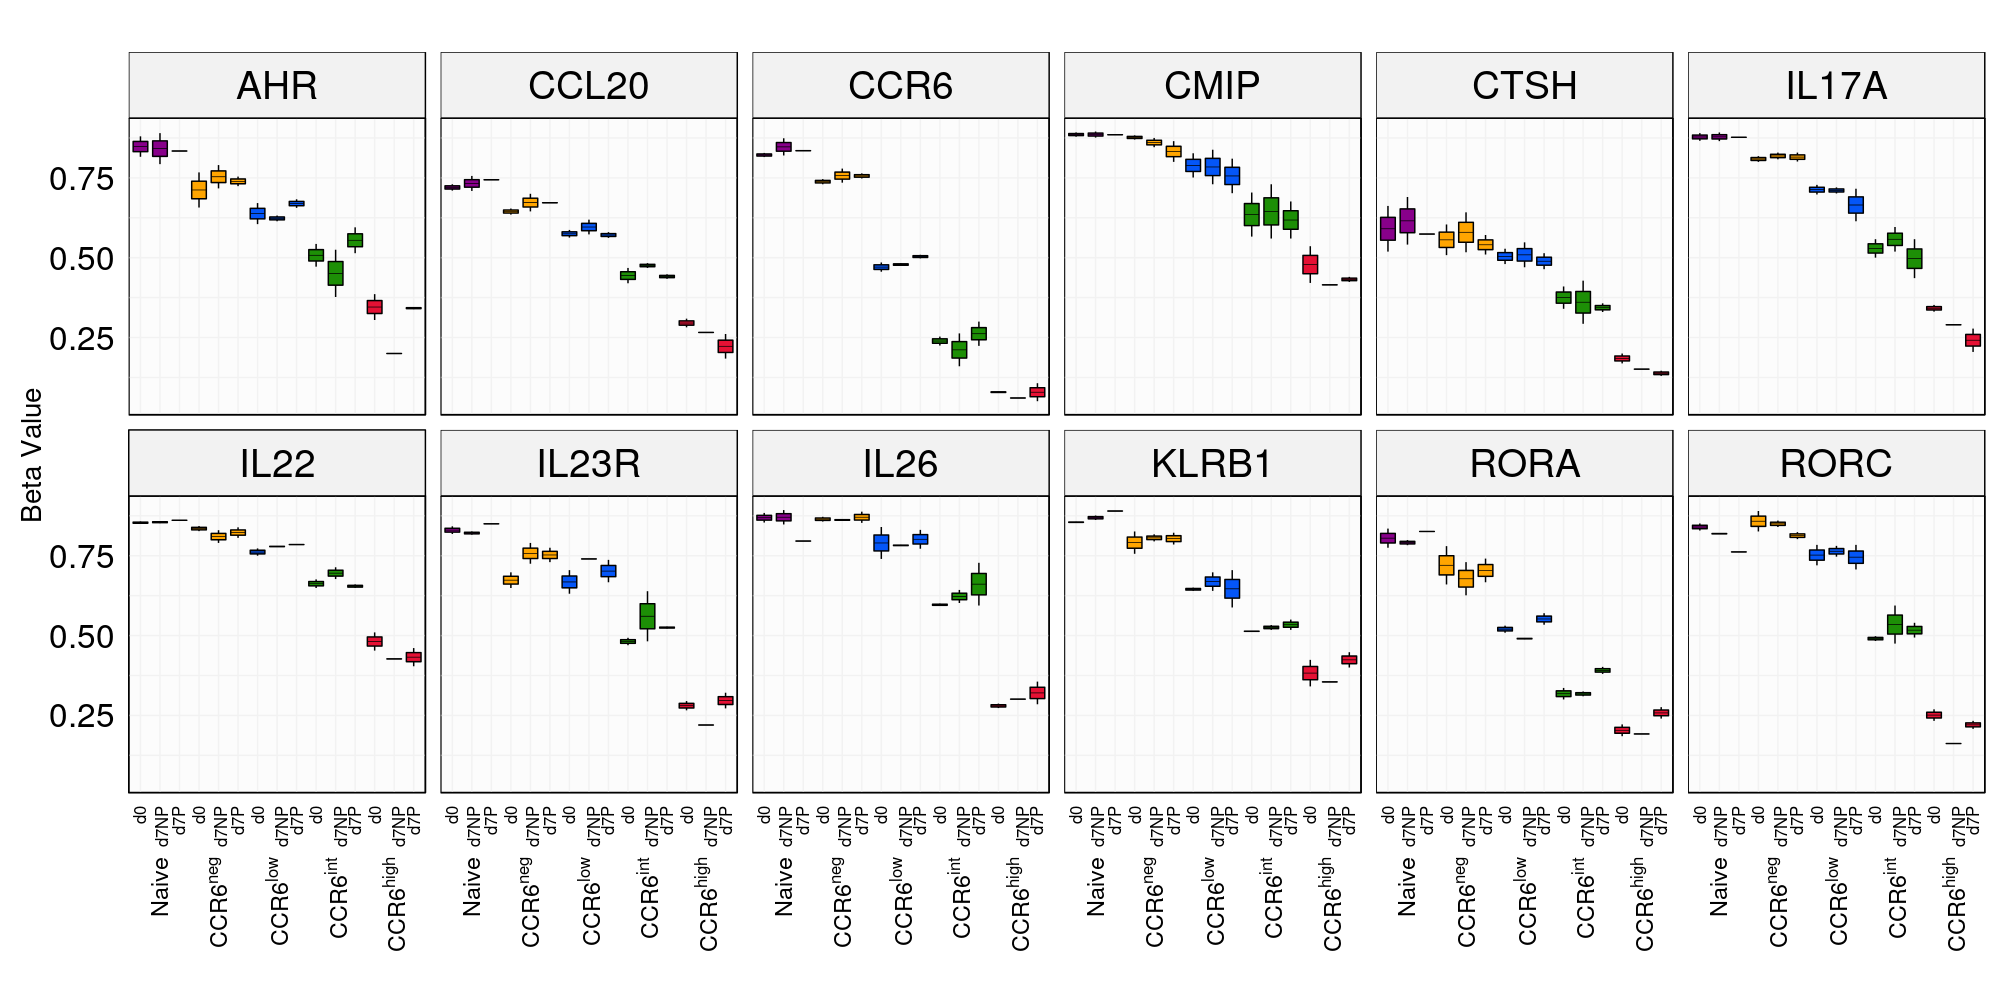

In [31]:
#####################
#The VIEW
#####################
options(repr.plot.width=10, repr.plot.height=5, repr.plot.res=200)
methylation_upregulated_box_Plot

In [32]:
##################
# SAVE PDF
##################
ggsave(file="../Result/Fluidigm_methylation_Timecourse_upregulated_box_Plot.png", device="png", plot=methylation_upregulated_box_Plot, width = 10, height = 5, units = "in", dpi=600)